In [3]:
%pip install pandas


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('crimedataset.csv')

# Display the first few rows of the DataFrame
print(df.head())

         ID Case Number                    Date                 Block  IUCR  \
0  13656067    JH492806  11/01/2024 12:00:00 AM    006XX N CICERO AVE  0620   
1  13650227    JH491940  11/01/2024 12:00:00 AM     089XX S LAFLIN ST  0560   
2  13649850    JH491289  11/01/2024 12:00:00 AM       003XX W OHIO ST  0810   
3  13650185    JH491764  11/01/2024 12:00:00 AM   015XX W CARROLL AVE  0820   
4  13654954    JH497594  11/01/2024 12:00:00 AM  043XX W MONTROSE AVE  0710   

  Primary Type               Description  \
0     BURGLARY            UNLAWFUL ENTRY   
1      ASSAULT                    SIMPLE   
2        THEFT                 OVER $500   
3        THEFT            $500 AND UNDER   
4        THEFT  THEFT FROM MOTOR VEHICLE   

                     Location Description  Arrest  Domestic  ...  Ward  \
0                       CONVENIENCE STORE   False     False  ...  28.0   
1                               RESIDENCE   False      True  ...  21.0   
2                                  STR

In [5]:
print('Chicago Crime data stats:')
print('---------------------------------------')
print('{:,} total records'.format(len(df)))  # No partitions for pandas DataFrame
print('DataFrame size: {:,}'.format(df.size))

Chicago Crime data stats:
---------------------------------------
8,195,302 total records
DataFrame size: 180,296,644


In [6]:
df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13718
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614830
Community Area          613455
FBI Code                     0
X Coordinate             90149
Y Coordinate             90149
Year                         0
Updated On                   0
Latitude                 90149
Longitude                90149
Location                 90149
dtype: int64

Convert date into datetime format

In [ ]:
import pandas as pd

# Load your data (assuming df is your DataFrame)
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract different components of the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

# Quick overview of data types and null values
print(df.info())


/var/folders/55/s3w3_hxj4h3ft2xxldl1wh1r0000gn/T/ipykernel_8870/991176122.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Using IterativeImputer from sklearn for MICE

In [7]:
%pip install scikit-learn
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # Enable experimental feature
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

# Load your DataFrame (df)

# Step 1: Select relevant features and prepare data for imputation
# Assume df already has a 'Date' column converted to datetime

# Extract Year and Month from Date if these might be predictive
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Encode categorical variables like 'Primary Type' to numerical values
label_encoder = LabelEncoder()
df['Primary_Type_Encoded'] = label_encoder.fit_transform(df['Primary Type'])

# Select columns for imputation
impute_columns = ['Latitude', 'Longitude', 'Community Area', 'District', 'Primary_Type_Encoded', 'Year', 'Month']
impute_df = df[impute_columns]

# Step 2: Initialize IterativeImputer and fit to data
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_array = imputer.fit_transform(impute_df)

# Step 3: Replace original columns with imputed values
imputed_df = pd.DataFrame(imputed_array, columns=impute_columns)
df['Latitude'] = imputed_df['Latitude']
df['Longitude'] = imputed_df['Longitude']

# Step 4: Add indicators for originally missing values (optional)
df['Latitude_Missing'] = df['Latitude'].isnull().astype(int)
df['Longitude_Missing'] = df['Longitude'].isnull().astype(int)

# Display info to verify no missing values remain in Latitude/Longitude
print(df[['Latitude', 'Longitude']].isnull().sum())


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Latitude     0
Longitude    0
dtype: int64


Impute Missing Community Area Using IterativeImputer


In [8]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # Enable experimental feature
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame with a 'Date' column converted to datetime

# Step 1: Extract additional features and encode categorical variables
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Encode 'Primary Type' as a numerical feature
label_encoder = LabelEncoder()
df['Primary_Type_Encoded'] = label_encoder.fit_transform(df['Primary Type'])

# Select columns for imputation
impute_columns = ['Latitude', 'Longitude', 'Community Area', 'District', 'Primary_Type_Encoded', 'Year', 'Month']
impute_df = df[impute_columns]

# Step 2: Initialize IterativeImputer and apply it to impute missing values
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_array = imputer.fit_transform(impute_df)

# Step 3: Replace original columns with imputed values
imputed_df = pd.DataFrame(imputed_array, columns=impute_columns)
df['Latitude'] = imputed_df['Latitude']
df['Longitude'] = imputed_df['Longitude']
df['Community Area'] = imputed_df['Community Area'].round().astype(int)  # Round to nearest integer for categorical data

# Optional Step 4: Add indicators to show which values were initially missing
df['Community_Area_Missing'] = df['Community Area'].isnull().astype(int)
df['Latitude_Missing'] = df['Latitude'].isnull().astype(int)
df['Longitude_Missing'] = df['Longitude'].isnull().astype(int)

# Check for remaining missing values
print(df[['Community Area', 'Latitude', 'Longitude']].isnull().sum())


Community Area    0
Latitude          0
Longitude         0
dtype: int64


In [9]:
df.isnull().sum()


ID                             0
Case Number                    0
Date                           0
Block                          0
IUCR                           0
Primary Type                   0
Description                    0
Location Description       13718
Arrest                         0
Domestic                       0
Beat                           0
District                      47
Ward                      614830
Community Area                 0
FBI Code                       0
X Coordinate               90149
Y Coordinate               90149
Year                           0
Updated On                     0
Latitude                       0
Longitude                      0
Location                   90149
Month                          0
DayOfWeek                      0
Hour                           0
Primary_Type_Encoded           0
Latitude_Missing               0
Longitude_Missing              0
Community_Area_Missing         0
dtype: int64

In [10]:
# Drop irrelevant columns
df.drop(columns=['ID', 'Case Number', 'IUCR', 'Block', 'FBI Code', 'Beat'], inplace=True)


In [11]:
df

,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,X Coordinate,...,Latitude,Longitude,Location,Month,DayOfWeek,Hour,Primary_Type_Encoded,Latitude_Missing,Longitude_Missing,Community_Area_Missing
0,2024-11-01,BURGLARY,UNLAWFUL ENTRY,CONVENIENCE STORE,False,False,11.0,28.0,25,NaN,...,41.870463,-87.667518,NaN,11,Friday,0,3,0,0,0
1,2024-11-01,ASSAULT,SIMPLE,RESIDENCE,False,True,22.0,21.0,73,1167901.0,...,41.731463,-87.660504,"(41.731462584, -87.660503907)",11,Friday,0,1,0,0,0
2,2024-11-01,THEFT,OVER $500,STREET,False,False,18.0,42.0,8,1174007.0,...,41.892358,-87.636392,"(41.892358446, -87.636391922)",11,Friday,0,34,0,0,0
3,2024-11-01,THEFT,$500 AND UNDER,STREET,False,False,12.0,27.0,28,1166235.0,...,41.887416,-87.664988,"(41.88741592, -87.664988379)",11,Friday,0,34,0,0,0
4,2024-11-01,THEFT,THEFT FROM MOTOR VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,17.0,39.0,16,1146714.0,...,41.960859,-87.735995,"(41.960858577, -87.735994826)",11,Friday,0,34,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8195297,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,2.0,5.0,41,1183119.0,...,41.796676,-87.604013,"(41.796676399, -87.604012947)",1,Monday,0,34,0,0,0
8195298,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,7.0,6.0,68,1172939.0,...,41.765054,-87.641686,"(41.765053677, -87.641686171)",1,Monday,0,34,0,0,0
8195299,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,4.0,10.0,46,1198833.0,...,41.733539,-87.547156,"(41.733539408, -87.547155925)",1,Monday,0,34,0,0,0
8195300,2001-01-01,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,SIDEWALK,False,False,2.0,4.0,35,1179347.0,...,41.831067,-87.617463,"(41.831067166, -87.617463217)",1,Monday,0,5,0,0,0


Remaining columns for prediction:

In [12]:
import pandas as pd

# List of columns to drop based on irrelevance to crime type prediction
columns_to_drop = ['ID', 'Case Number', 'IUCR', 'Block', 'FBI Code', 'Beat']

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Check the resulting columns
print("Remaining columns for prediction:")
print("-----------------------------------")
print(df.columns)


Remaining columns for prediction:
-----------------------------------
Index(['Date', 'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'District', 'Ward', 'Community Area', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'DayOfWeek', 'Hour', 'Primary_Type_Encoded',
       'Latitude_Missing', 'Longitude_Missing', 'Community_Area_Missing'],
      dtype='object')


Univariate Analysyis- Most common crime types 

<Axes: xlabel='Primary Type'>

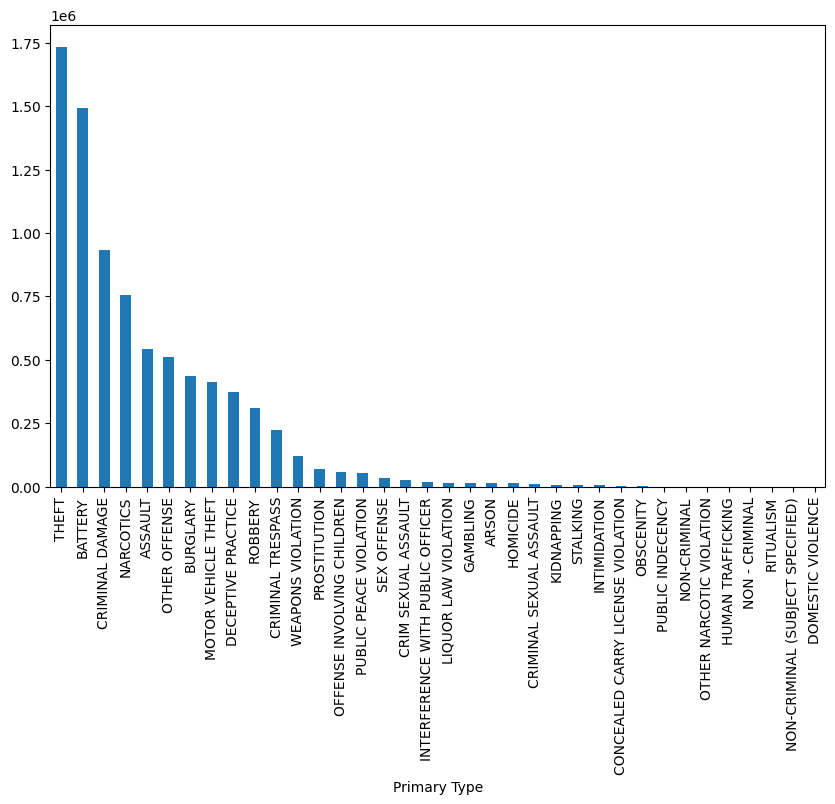

In [13]:
df['Primary Type'].value_counts().plot(kind='bar', figsize=(10, 6))

Bivariate analysis- hotspots or areas where certain crimes are more

<Axes: xlabel='Community Area'>

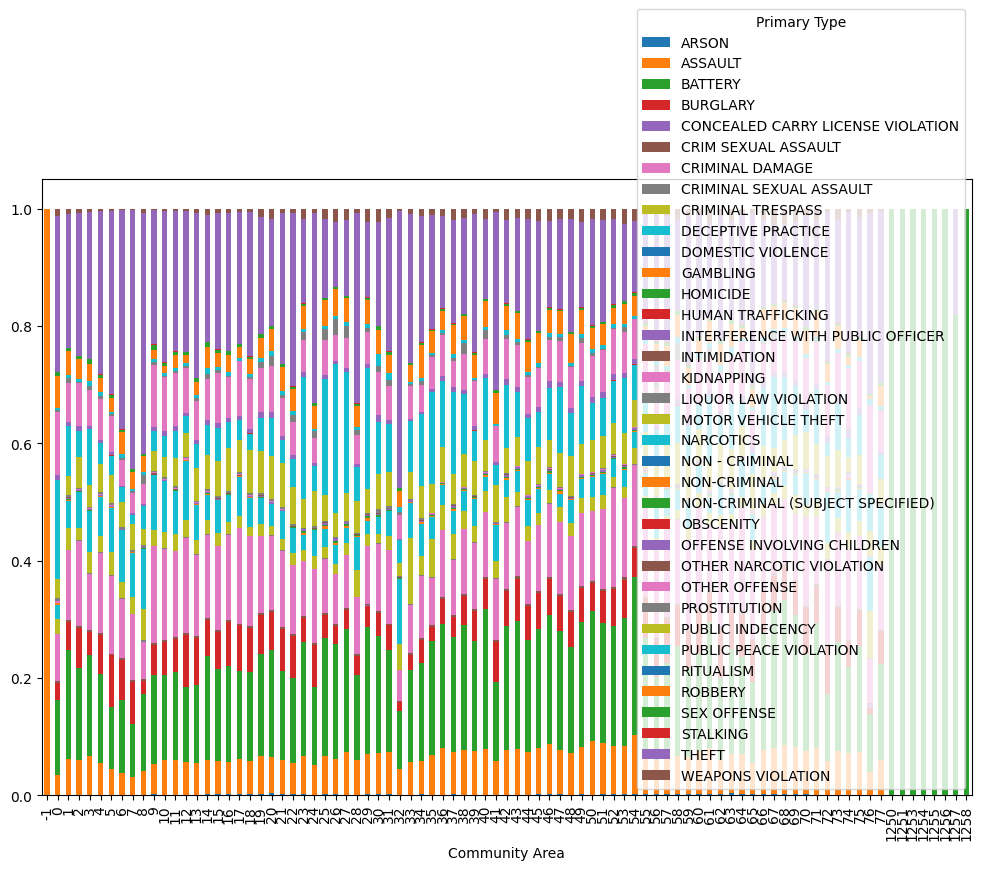

In [14]:
crime_by_area = df.groupby('Community Area')['Primary Type'].value_counts(normalize=True).unstack()
crime_by_area.plot(kind='bar', stacked=True, figsize=(12, 8))


Time of Day Analysis:

<Axes: xlabel='Hour'>

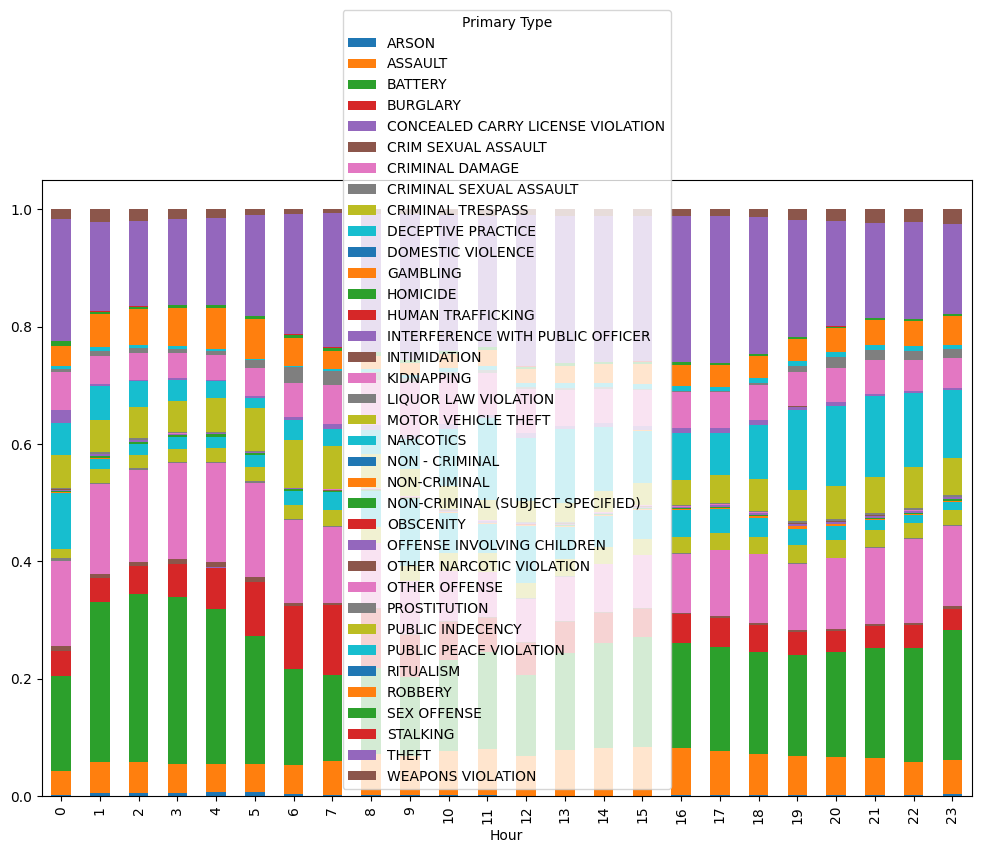

In [15]:
crime_by_hour = df.groupby('Hour')['Primary Type'].value_counts(normalize=True).unstack()
crime_by_hour.plot(kind='bar', stacked=True, figsize=(12, 8))


In [ ]:
%pip. 